In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1320 sha256=499fe922fd2acfe49cb6ecbf139389b9242938f0ade0685ce66b6be4cfaca29f
  Stored in directory: c:\users\chris\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [1]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [3]:
# Set features. This will also be used as your x values.
selected_features = df[['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period','koi_time0bk','koi_slogg','koi_srad','ra','dec','koi_kepmag']]

# Create a Train Test Split

Use `koi_disposition` for the y values

In [4]:
# split data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(selected_features, df['koi_disposition'], random_state=42)

In [5]:
X_train.head(10)

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_slogg,koi_srad,ra,dec,koi_kepmag
6122,0,0,0,0,6.768901,133.077240,4.327,1.125,294.40472,39.351681,14.725
6370,0,1,0,1,0.733726,132.020050,4.578,0.797,284.50391,42.463860,15.770
2879,1,0,0,0,7.652707,134.460380,4.481,0.963,295.50211,38.983540,13.099
107,0,0,0,0,7.953547,174.662240,4.536,0.779,291.15878,40.750271,15.660
29,0,0,0,0,4.959319,172.258529,4.359,1.082,292.16705,48.727589,15.263
6291,0,1,0,0,45.433249,159.870473,4.359,1.080,297.38031,47.545029,14.774
5193,0,0,0,0,78.866840,143.731400,4.264,1.381,289.03772,49.712601,12.914
2505,0,1,0,0,19.193104,176.966757,4.530,0.892,296.24954,42.335480,14.847
2984,0,0,0,0,7.298142,137.856740,4.508,0.834,291.39938,38.787750,15.825
2699,0,0,0,0,7.751928,176.171970,4.520,0.912,292.15045,39.637581,13.307


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [7]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

k: 1, Train/Test Score: 1.000/0.762
k: 3, Train/Test Score: 0.893/0.774
k: 5, Train/Test Score: 0.862/0.783
k: 7, Train/Test Score: 0.853/0.779
k: 9, Train/Test Score: 0.838/0.779
k: 11, Train/Test Score: 0.830/0.775
k: 13, Train/Test Score: 0.825/0.777
k: 15, Train/Test Score: 0.825/0.780
k: 17, Train/Test Score: 0.822/0.779
k: 19, Train/Test Score: 0.818/0.776


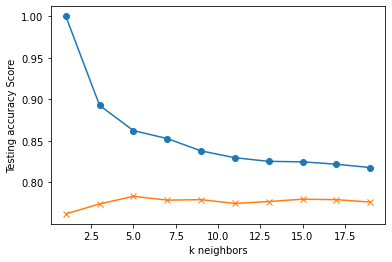

In [10]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
    from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()